# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sinasc = pd.read_csv('b1abb33c4f.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
sinasc.APGAR5.head()

0    10.0
1     9.0
2    10.0
3    10.0
4    10.0
Name: APGAR5, dtype: float64

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [6]:
sinasc.loc[(sinasc['APGAR5']<=3), 'CAT_ASFIXIA'] = 'asfixia grave'
sinasc.loc[sinasc['APGAR5'].isin([4,5]), 'CAT_ASFIXIA'] = 'asfixia moderada'
sinasc.loc[sinasc['APGAR5'].isin([6,7]), 'CAT_ASFIXIA'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5']>=8), 'CAT_ASFIXIA'] = 'normal'

sinasc[['APGAR5','CAT_ASFIXIA']].head(20)

,APGAR5,CAT_ASFIXIA
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
5,10.0,normal
6,10.0,normal
7,10.0,normal
8,9.0,normal
9,10.0,normal


##### Vamos visualizar apenas os valores que não foram classificados como normal na coluna 'CAT_ASFIXIA'

In [9]:
sinasc.loc[sinasc['APGAR5'] <= 7, ['APGAR5', 'CAT_ASFIXIA']]

,APGAR5,CAT_ASFIXIA
14,7.0,asfixia leve
20,0.0,asfixia grave
182,4.0,asfixia moderada
185,3.0,asfixia grave
205,6.0,asfixia leve
...,...,...
26915,5.0,asfixia moderada
26921,6.0,asfixia leve
26932,0.0,asfixia grave
26936,4.0,asfixia moderada


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

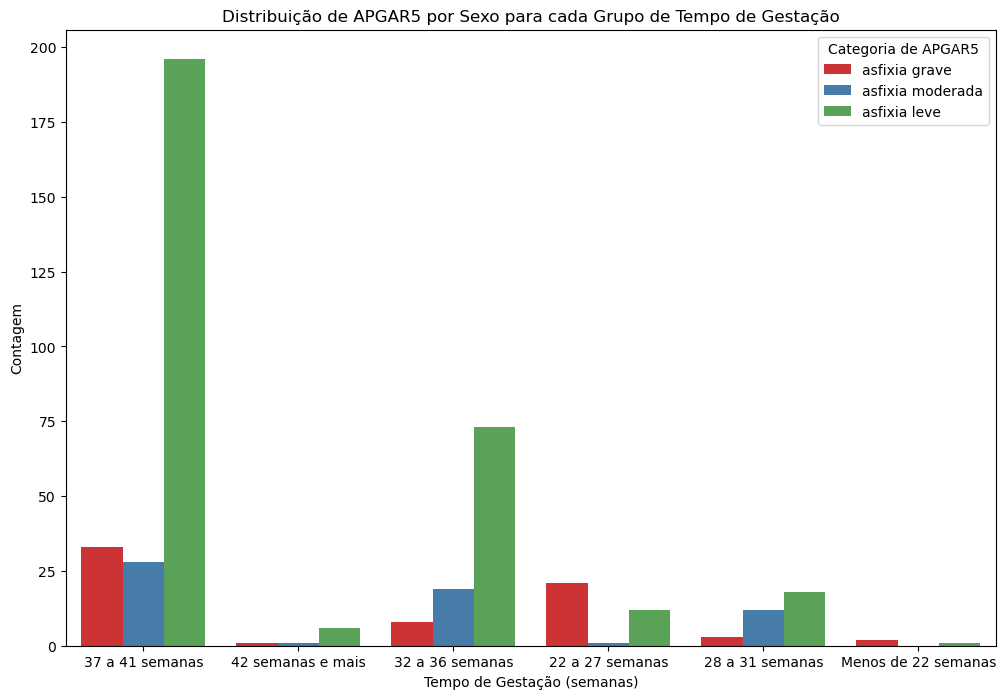

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(data=sinasc, x='GESTACAO', hue='CAT_ASFIXIA', hue_order=['asfixia grave', 'asfixia moderada', 'asfixia leve'], palette='Set1')
plt.title('Distribuição de APGAR5 por Sexo para cada Grupo de Tempo de Gestação')
plt.xlabel('Tempo de Gestação (semanas)')
plt.ylabel('Contagem')
plt.legend(title='Categoria de APGAR5')

(0.0, 30.0)

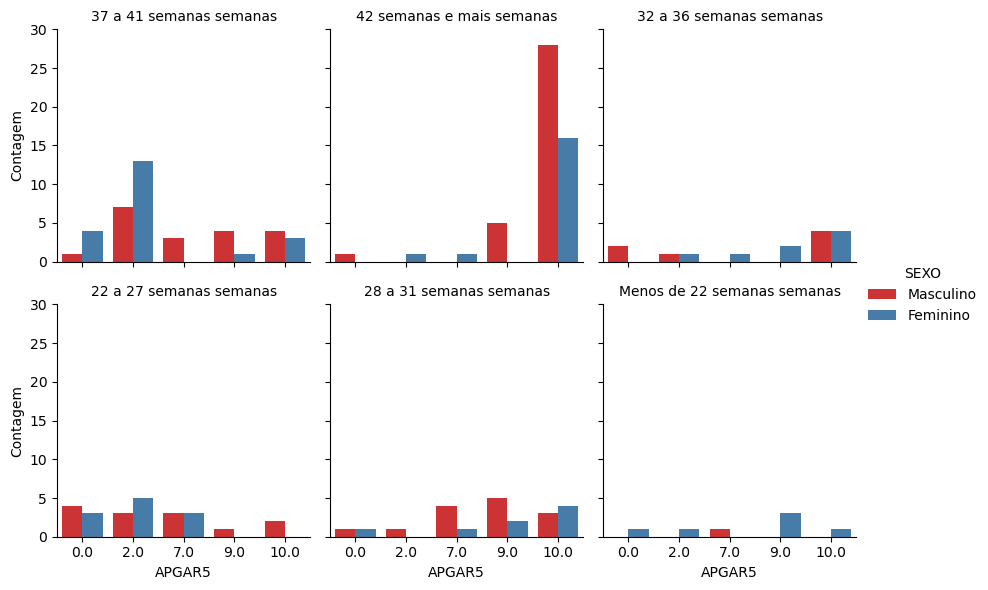

In [11]:
g = sns.FacetGrid(sinasc, col="GESTACAO", margin_titles=True, col_wrap=3)
g.map_dataframe(sns.countplot, x="APGAR5", hue="SEXO", palette='Set1')
g.set_titles(col_template="{col_name} semanas")
g.set_axis_labels("APGAR5", "Contagem")
g.add_legend(title="SEXO")
plt.ylim(0,30)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [12]:
tab_cruzada = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])

tab_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [13]:
freq_APGAR5 = tab_cruzada.div(tab_cruzada.sum(axis = 1), axis = 0)

freq_APGAR5

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [14]:
freq_APGAR5.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

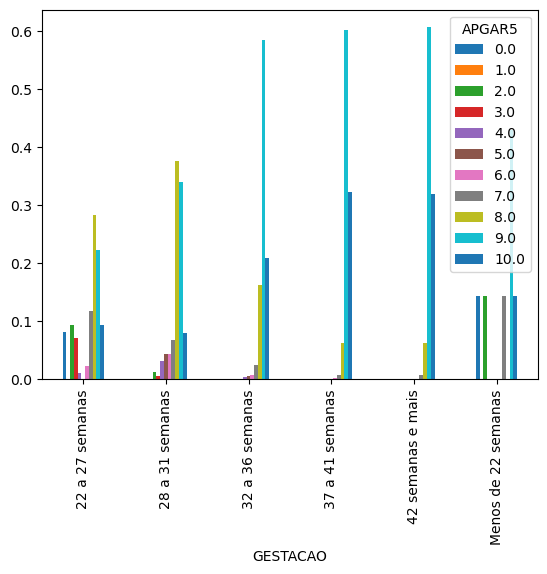

In [15]:
plt.close('all')
freq_APGAR5.plot.bar()

C:\Users\PFALAGOAS\AppData\Local\Temp\ipykernel_7068\4262265786.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar',data=freq_APGAR5, ci=None)


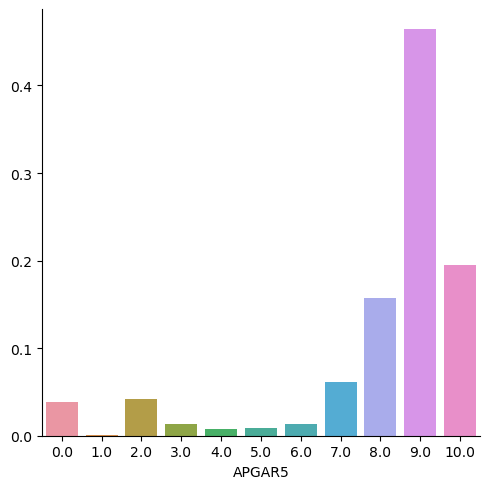

In [16]:
sns.catplot(kind='bar',data=freq_APGAR5, ci=None)

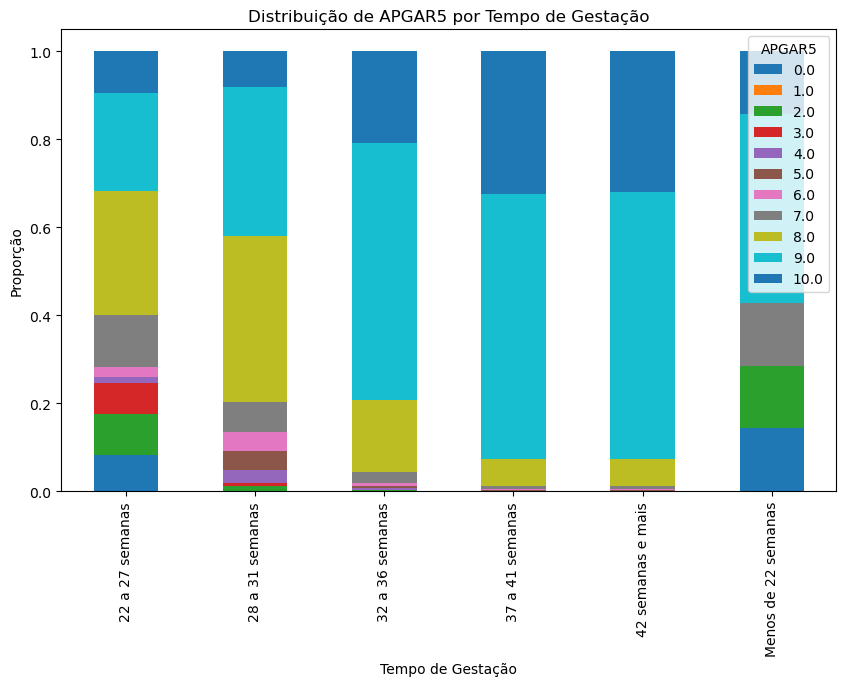

In [17]:
plt.close('all')
freq_APGAR5.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Proporção')
plt.legend(title='APGAR5')

#### baseado nos gráficos acima, pode-se perceber que quanto menos tempo de gravidez, maior será o risco de asfixia. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [20]:
df_analise = sinasc[['PESO','APGAR5','CAT_ASFIXIA']]
df_analise




,PESO,APGAR5,CAT_ASFIXIA
0,3685,10.0,normal
1,3055,9.0,normal
2,3460,10.0,normal
3,2982,10.0,normal
4,3310,10.0,normal
...,...,...,...
27023,2110,9.0,normal
27024,3310,9.0,normal
27025,3065,10.0,normal
27026,2352,9.0,normal


<Axes: xlabel='PESO', ylabel='CAT_ASFIXIA'>

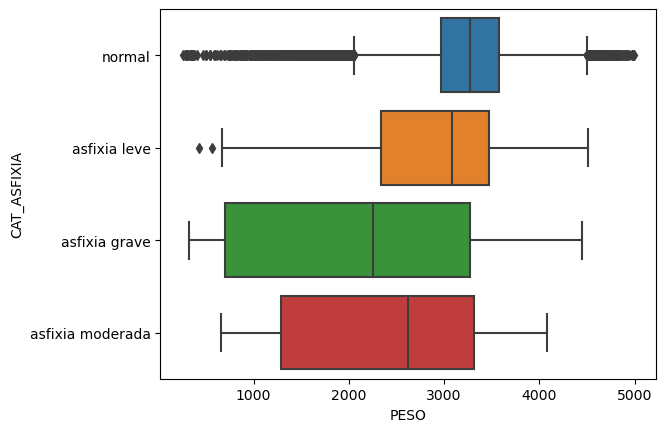

In [33]:
plt.close('all')
sns.boxplot(x="PESO", y='CAT_ASFIXIA', data=df_analise[df_analise['PESO']<5000])


##### De acordo com o gráfico, podemos concluir que o peso tem relação com a gravidade da asfixia, pois quanto menor o peso, maiores são as chances de asfixia.

### BONUS
#### Repetindo a mesma análise do exercício 6, mas utilizando a categoria criada com a classificação da asfixia. 

In [45]:
tab_cat = pd.crosstab(sinasc['GESTACAO'], sinasc['CAT_ASFIXIA'])

tab_cat

CAT_ASFIXIA,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


In [50]:
freq_CAT = tab_cat.div(tab_cat.sum(axis = 1), axis = 0)

freq_CAT

CAT_ASFIXIA,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


In [51]:
freq_CAT.sum(axis=1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

<Axes: xlabel='GESTACAO'>

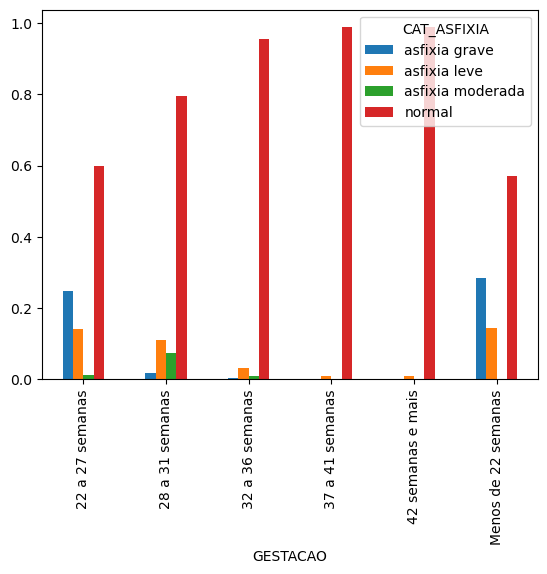

In [52]:
plt.close('all')
freq_CAT.plot.bar()

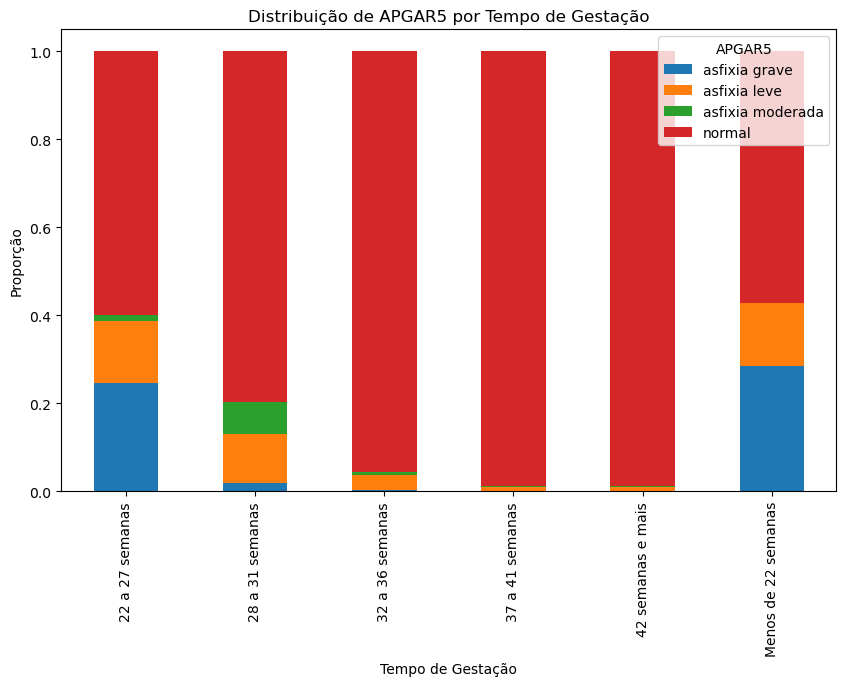

In [54]:
plt.close('all')
freq_CAT.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Proporção')
plt.legend(title='APGAR5')